<a href="https://colab.research.google.com/github/dlagur/rep4DL/blob/main/DL_using_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import keras
from keras.datasets import mnist
from keras.utils import np_utils

In [2]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout
from keras.layers import Activation
from keras import backend as K

In [3]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
type(x_train[0]), x_train.shape, y_train.shape

(numpy.ndarray, (60000, 28, 28), (60000,))

* Plotting

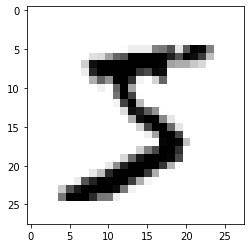

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(x_train[0], cmap=plt.cm.binary)

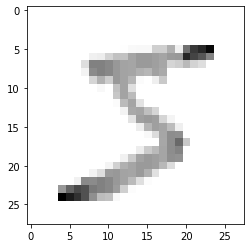

In [6]:
import tensorflow as tf
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)
plt.imshow(x_train[0], cmap=plt.cm.binary)

In [7]:
model = Sequential()

# 28*28 픽셀 크기의 이미지를 784 엘리먼트의 단일 벡터로 변경해 입력
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(24, activation='relu',
                kernel_initializer='glorot_uniform', # 가중치 초기화 
                bias_initializer='zeros'))
model.add(Dense(8, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.add(Dense(18, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [8]:
# glorot_unitform : 거즁차룰 -한도 ~ 한도 사이의 균일 분포 샘플에서 추출
# 한도 = sqrt(6 / (fan-in + fan_out)) : 가중치 텐서의 입력 유닛 수  + 가중치 텐서의 출력 유닛 수
# random_uniform : 가중치를 -0.05~0.05 사이의 작은 균일 값에서 무작위로 초기화
# random_normal : 가중치를 표준 0, 표준편차 0.05를 따르는 가우시안 분포에 따라 초기화
# zero : 레이어 가중치를 0으로 초기화 

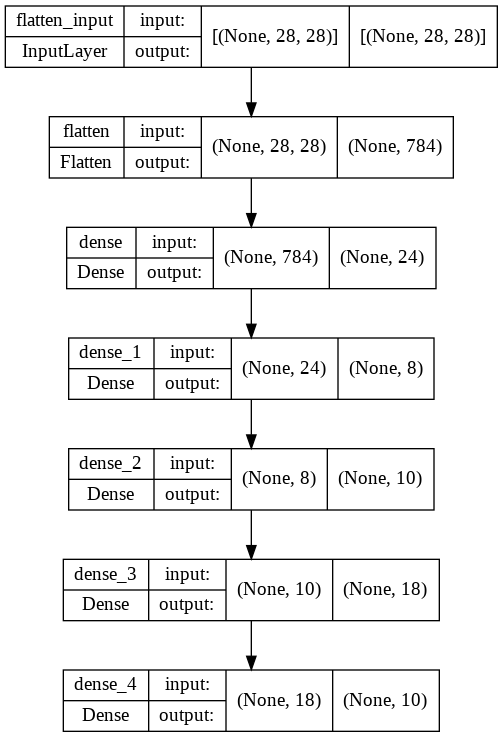

In [9]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 24)                18840     
                                                                 
 dense_1 (Dense)             (None, 8)                 200       
                                                                 
 dense_2 (Dense)             (None, 10)                90        
                                                                 
 dense_3 (Dense)             (None, 18)                198       
                                                                 
 dense_4 (Dense)             (None, 10)                190       
                                                                 
Total params: 19,518
Trainable params: 19,518
Non-traina

In [11]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
model.fit(x_train, y_train,
          epochs=5, 
          batch_size=100, 
          validation_split=0.33)

Epoch 1/5
402/402 [==============================] - 2s 4ms/step - loss: 1.8463 - accuracy: 0.3967 - val_loss: 1.3941 - val_accuracy: 0.5278
Epoch 2/5
402/402 [==============================] - 3s 6ms/step - loss: 1.1275 - accuracy: 0.6084 - val_loss: 0.9273 - val_accuracy: 0.6969
Epoch 3/5
402/402 [==============================] - 3s 6ms/step - loss: 0.7898 - accuracy: 0.7619 - val_loss: 0.6692 - val_accuracy: 0.8317
Epoch 4/5
402/402 [==============================] - 2s 6ms/step - loss: 0.5740 - accuracy: 0.8579 - val_loss: 0.5158 - val_accuracy: 0.8718
Epoch 5/5
402/402 [==============================] - 3s 6ms/step - loss: 0.4548 - accuracy: 0.8860 - val_loss: 0.4427 - val_accuracy: 0.8879


In [13]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.4473 - accuracy: 0.8913


[0.4472588002681732, 0.8913000226020813]

In [14]:
predictions = model.predict([x_test])

#모델에서 생성된 추론 그래프를 사용해 테스트 데이터셋의 클래스 라벨을 추론
# x_test 객체 110번에 대한 예측의 최곳값을 출력

import numpy as np
print(np.argmax(predictions[110]))

8


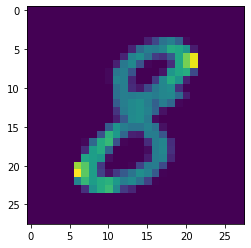

In [15]:
plt.imshow(x_test[110])

In [24]:
# 모델 구현, 피드포워드 네트워크
import keras.regularizers
model = Sequential()
model.add(Flatten(input_shape=(28, 28, )))
model.add(Dense(1024, kernel_regularizer= keras.regularizers.l2(0.0001),
                activation='relu'))
model.add(Dense(28, kernel_regularizer= keras.regularizers.l2(0.0001),
                activation='relu'))
model.add(Dense(10, activation='softmax'))

In [25]:
#가중치 정규화
import keras.regularizers
model = Sequential()
model.add(Flatten(input_shape=(28, 28, )))
model.add(Dense(1024,
                kernel_regularizer=keras.regularizers.l2(0.0001), 
                activation='relu'))
model.add(Dense(10, activation='softmax'))

In [27]:
# 간단한 피드포워드 뉴럴 네트워크
model = Sequential()

#28x28 픽셀 행렬로 구성된 이미지를 784개 엘리먼트를 가진 단일 배열로 입력
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(28, activation='relu'))
model.add(Dense(10, activation='softmax'))